# Part A: Support Vector Machines (SVMs) and Kernel Methods - HIGGS Dataset

# Step 1: Data Loading and Pre-processing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

### Loading the Dataset

We will start by loading a 0.1% sample of the HIGGS dataset to work with for our exploratory data analysis and subsequent steps. 


In [8]:
columns = ['class'] + [f'feature_{i}' for i in range(1, 29)]

df = pd.read_csv('HIGGS.csv', header=None, names=columns)
data = df.sample(frac=0.001, random_state=42)

### Basic Information about the Dataset

Let's explore the structure of the dataset, including the shape, and basic statistics of the features.


In [11]:
data.head()

class  feature_1  feature_2  feature_3  feature_4  feature_5  \
3967303    0.0   1.138683  -0.726635  -0.005790   0.204118   0.153842   
5946179    1.0   0.404633   1.014821  -1.050041   1.136441  -1.403536   
6910558    0.0   1.137585   0.325251   1.453598   0.804114   0.893516   
3414332    0.0   1.380438  -0.595149  -0.727112   0.465392  -0.057453   
5840458    1.0   0.962628   1.191110  -1.161568   1.541759   0.569159   

         feature_6  feature_7  feature_8  feature_9  ...  feature_19  \
3967303   1.585904  -0.045576  -1.448527   1.086538  ...   -2.439800   
5946179   3.218436  -1.944837   0.801788   0.000000  ...   -1.174742   
6910558   0.418095  -1.164536  -0.585919   0.000000  ...    0.280201   
3414332   0.399224  -0.076273   1.080084   2.173076  ...    1.261267   
5840458   1.337374   0.810973   0.458075   1.086538  ...    0.413452   

         feature_20  feature_21  feature_22  feature_23  feature_24  \
3967303    0.073642    0.000000    1.790497    1.730592    0.980587   
5946179   -0.912542    0.000000    1.072789    0.649697    0.981147   
6910558   -0.982461    3.101961    0.816500    0.933867    0.988956   
3414332    1.129085    0.000000    0.563342    0.857068    0.992465   
5840458    1.309431    3.101961    1.596246    1.146864    1.687726   

         feature_25  feature_26  feature_27  feature_28  
3967303    0.743065    2.378752    1.534863    1.227558  
5946179    2.004577    0.521853    1.246037    1.461494  
6910558    0.852772    0.415455    0.737194    0.691437  
3414332    0.875139    0.512037    0.686362    0.887047  
5840458    1.178736    0.925320    1.094308    0.991339  

[5 rows x 29 columns]

In [13]:
print(data.columns)

Index(['class', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28'],
      dtype='object')


In [15]:
data.describe()

class     feature_1     feature_2     feature_3     feature_4  \
count  11000.000000  11000.000000  11000.000000  11000.000000  11000.000000   
mean       0.530455      0.996983     -0.008056     -0.011434      1.003019   
std        0.499094      0.577650      1.005337      0.999754      0.602855   
min        0.000000      0.274880     -2.381408     -1.742508      0.007558   
25%        0.000000      0.584851     -0.742462     -0.878173      0.581481   
50%        1.000000      0.853371     -0.004924     -0.017997      0.894515   
75%        1.000000      1.244279      0.737240      0.844361      1.296294   
max        1.000000      7.636969      2.423180      1.743236      6.411345   

          feature_5     feature_6     feature_7     feature_8     feature_9  \
count  11000.000000  11000.000000  11000.000000  11000.000000  11000.000000   
mean      -0.005002      0.992924     -0.012543      0.014720      1.008999   
std        1.005587      0.475929      1.003667      1.008244      1.027228   
min       -1.743250      0.151793     -2.966754     -1.741237      0.000000   
25%       -0.884389      0.685291     -0.706059     -0.855346      0.000000   
50%        0.002643      0.894544     -0.024781      0.031760      1.086538   
75%        0.869936      1.173649      0.661696      0.889518      2.173076   
max        1.742841      5.678731      2.966703      1.741454      2.173076   

       ...    feature_19    feature_20    feature_21    feature_22  \
count  ...  11000.000000  11000.000000  11000.000000  11000.000000   
mean   ...      0.003084      0.003470      0.981912      1.040879   
std    ...      1.011725      1.011600      1.392429      0.698445   
min    ...     -2.495599     -1.742691      0.000000      0.144896   
25%    ...     -0.715856     -0.877583      0.000000      0.793079   
50%    ...      0.007035      0.009827      0.000000      0.895733   
75%    ...      0.717641      0.885478      3.101961      1.032161   
max    ...      2.498009      1.742817      3.101961     21.860922   

         feature_23    feature_24    feature_25    feature_26    feature_27  \
count  11000.000000  11000.000000  11000.000000  11000.000000  11000.000000   
mean       1.028373      1.049957      1.015110      0.972411      1.037388   
std        0.393918      0.164127      0.402136      0.523245      0.371101   
min        0.344965      0.448875      0.410048      0.094202      0.366228   
25%        0.845463      0.985781      0.770757      0.669214      0.821776   
50%        0.952085      0.989793      0.919631      0.874877      0.948482   
75%        1.086192      1.019968      1.152347      1.137313      1.145896   
max       10.939556      3.159642      7.513541      7.803239      6.568859   

         feature_28  
count  11000.000000  
mean       0.963671  
std        0.316371  
min        0.430968  
25%        0.772715  
50%        0.872336  
75%        1.066616  
max        4.609284  

[8 rows x 29 columns]

### Exploratory Data Analysis (EDA)

We will visualize the distribution of the features and the target variable to understand the data better. This will help us identify any outliers or anomalies.


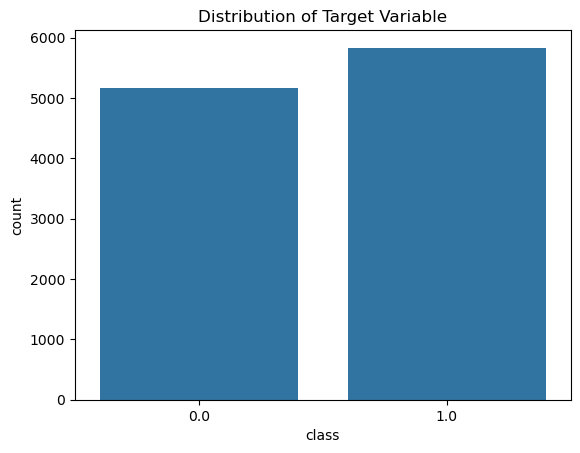

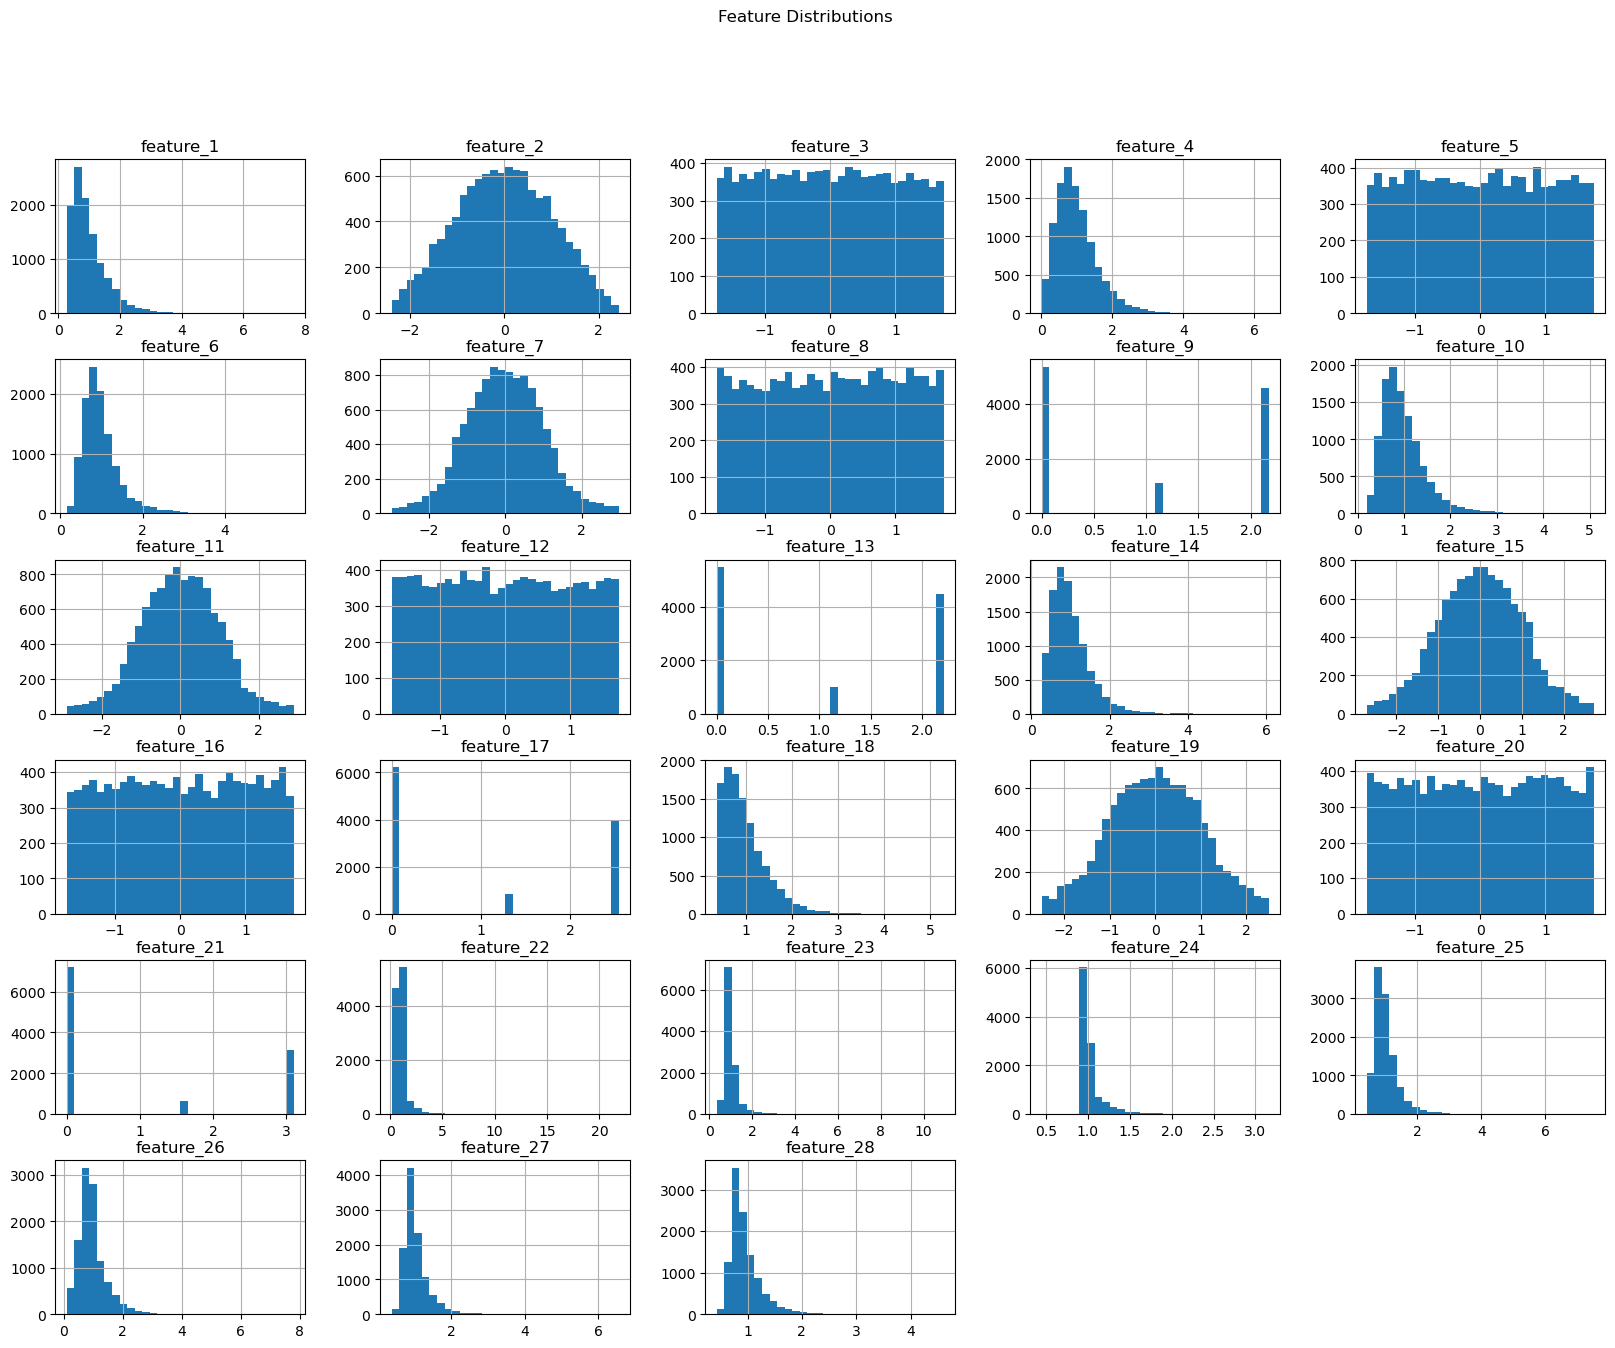

In [21]:
sns.countplot(x='class', data=data)
plt.title('Distribution of Target Variable')
plt.show()

data.iloc[:, 1:].hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

### Removing Outliers
We will use the Interquartile Range Method to remove outliers. 

#### Steps to Remove Outliers Using the IQR Method
1. **Calculate Q1 (First Quartile) and Q3 (Third Quartile)**:
   - Q1 is the median of the first half of the data.
   - Q3 is the median of the second half of the data.
2. **Calculate IQR**:
   - IQR = Q3 - Q1
3. **Determine the Lower and Upper Bound**:
   - Lower Bound = Q1 - 1.5 * IQR
   - Upper Bound = Q3 + 1.5 * IQR
4. **Identify and Remove Outliers**:
   - Any data point below the Lower Bound or above the Upper Bound is considered an 

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_removed = {}

for column in data.columns:
    outliers = ((data[column] < lower_bound[column]) | (data[column] > upper_bound[column]))
    outliers_removed[column] = outliers.sum()

    data = data[~outliers]

for feature, count in outliers_removed.items():
    print(f"Feature '{feature}': {count} outliers removed")

Feature 'class': 0 outliers removed
Feature 'feature_1': 440 outliers removed
Feature 'feature_2': 0 outliers removed
Feature 'feature_3': 0 outliers removed
Feature 'feature_4': 312 outliers removed
Feature 'feature_5': 0 outliers removed
Feature 'feature_6': 396 outliers removed
Feature 'feature_7': 81 outliers removed
Feature 'feature_8': 0 outliers removed
Feature 'feature_9': 0 outliers removed
Feature 'feature_10': 211 outliers removed
Feature 'feature_11': 54 outliers removed
Feature 'feature_12': 0 outliers removed
Feature 'feature_13': 0 outliers removed
Feature 'feature_14': 210 outliers removed
Feature 'feature_15': 0 outliers removed
Feature 'feature_16': 0 outliers removed
Feature 'feature_17': 0 outliers removed
Feature 'feature_18': 245 outliers removed
Feature 'feature_19': 0 outliers removed
Feature 'feature_20': 0 outliers removed
Feature 'feature_21': 0 outliers removed
Feature 'feature_22': 1123 outliers removed
Feature 'feature_23': 131 outliers removed
Feature 'fe

In [26]:
data.head()

class  feature_1  feature_2  feature_3  feature_4  feature_5  \
6910558     0.0   1.137585   0.325251   1.453598   0.804114   0.893516   
3414332     0.0   1.380438  -0.595149  -0.727112   0.465392  -0.057453   
7461995     0.0   0.746311   0.029165  -0.967922   1.400719   1.604916   
10425963    0.0   0.997766  -0.263026  -0.359236   1.482495   0.049030   
4193623     0.0   1.100068  -0.250364  -1.275870   0.565178   1.454088   

          feature_6  feature_7  feature_8  feature_9  ...  feature_19  \
6910558    0.418095  -1.164536  -0.585919   0.000000  ...    0.280201   
3414332    0.399224  -0.076273   1.080084   2.173076  ...    1.261267   
7461995    0.729835   0.730764  -1.271681   0.000000  ...   -0.217828   
10425963   0.474342  -0.208964   1.423242   2.173076  ...    1.432828   
4193623    0.822724   0.414881   1.514160   2.173076  ...   -0.187846   

          feature_20  feature_21  feature_22  feature_23  feature_24  \
6910558    -0.982461    3.101961    0.816500    0.933867    0.988956   
3414332     1.129085    0.000000    0.563342    0.857068    0.992465   
7461995    -0.043547    3.101961    0.913654    1.045282    1.038454   
10425963    1.054172    0.000000    0.939707    0.702773    0.976983   
4193623     0.748970    3.101961    0.848735    0.921618    0.981417   

          feature_25  feature_26  feature_27  feature_28  
6910558     0.852772    0.415455    0.737194    0.691437  
3414332     0.875139    0.512037    0.686362    0.887047  
7461995     0.937812    1.048914    0.863569    0.770683  
10425963    0.996387    0.641514    0.969489    0.825425  
4193623     0.672820    0.818137    0.933526    0.842690  

[5 rows x 29 columns]

### Separating Features and Target

In [29]:
X = data.drop('class', axis=1)
y = data['class']

print(X.shape, y.shape)

(5815, 28) (5815,)


### Plotting the Correlation Heatmap

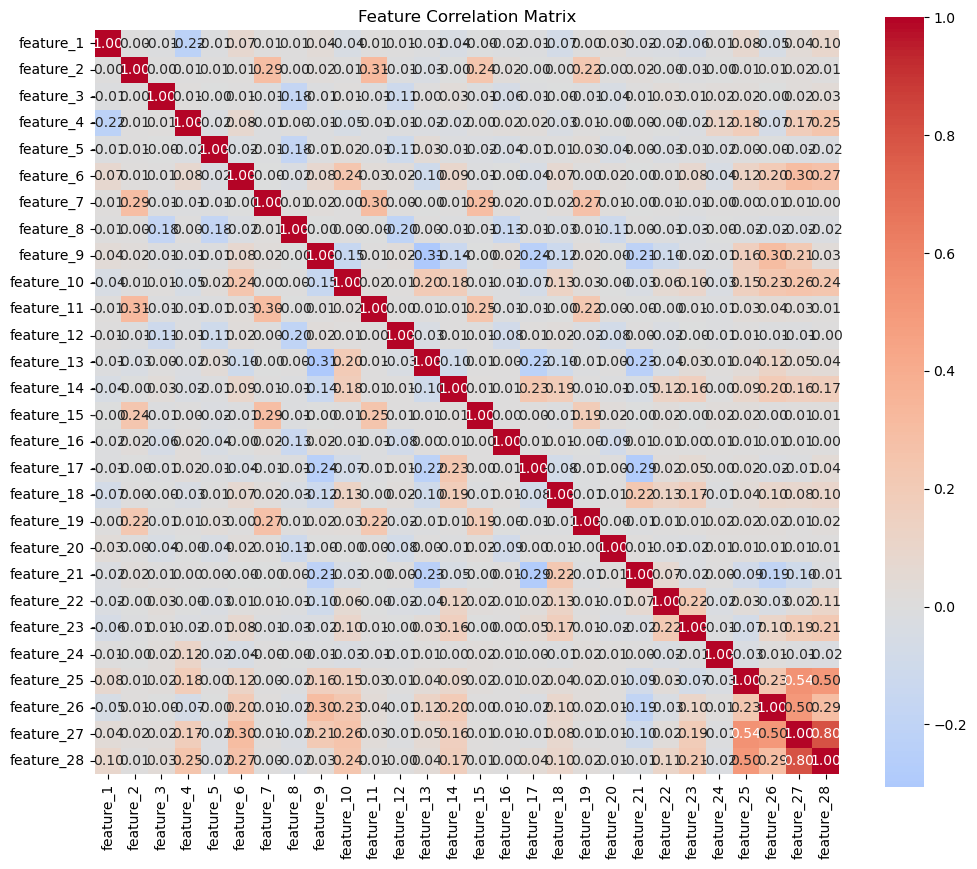

In [32]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

### Data Normalization/Standardization

To ensure that all features contribute equally to the model, we will apply standardization to the feature columns. Standardization ensures the mean of the features is 0 and standard deviation is 1.


In [35]:
scaler = StandardScaler()
X_copy = X.copy()
X = pd.DataFrame(scaler.fit_transform(X_copy), columns = X_copy.columns)

### Feature Engineering

We will create polynomial features of degree 2, which will capture interactions between the original features. These new features can help the model capture non-linear relationships.


In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

features = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=features)

X_poly_df = X_poly_df.drop(X.columns, axis=1)

print(f"New number of features after polynomial transformation: {X_poly_df.shape[1]}")

New number of features after polynomial transformation: 406


### Feature Selection

We'll use SelectKBest to identify the most important features for our classifier.

In [41]:
X = X_poly_df.copy()

selector = SelectKBest(f_classif, k=30)  # selecting 30 since its closer to the original number of features
selector.fit(X, y)
X_kbest = selector.transform(X)

k_best_features = X.columns[selector.get_support()].tolist()

print(f"{len(k_best_features)} best features: {k_best_features}")

X = pd.DataFrame(X_kbest, columns = k_best_features)

30 best features: ['feature_1 feature_6', 'feature_1 feature_9', 'feature_1 feature_14', 'feature_1 feature_21', 'feature_1 feature_28', 'feature_4^2', 'feature_4 feature_9', 'feature_4 feature_26', 'feature_6 feature_26', 'feature_6 feature_27', 'feature_6 feature_28', 'feature_7^2', 'feature_7 feature_11', 'feature_9 feature_10', 'feature_9 feature_26', 'feature_10 feature_26', 'feature_10 feature_27', 'feature_10 feature_28', 'feature_14 feature_26', 'feature_14 feature_27', 'feature_17^2', 'feature_21 feature_26', 'feature_23^2', 'feature_25^2', 'feature_26^2', 'feature_26 feature_27', 'feature_26 feature_28', 'feature_27^2', 'feature_27 feature_28', 'feature_28^2']


### Summary

- **Exploratory Data Analysis (EDA)**: We visualized the distributions of the features and the target variable.
- **Data Normalization/Standardization**: Applied standardization to the feature set.
- **Feature Engineering**: Created polynomial features of degree 2 to capture feature interactions.
- **Feature Selection**: Selected the top 30 polynomial features using ANOVA F-value through SelectKBest.

In the next step, we will proceed with implementing an SVM model using a linear kernel, evaluating it using cross-validation, and reporting the key classification metrics.


# Step 2: Linear SVM Implementation

### Linear SVM Implementation with Cross Validation

For the first implementation, we will use **SVC** from sklearn's svm library with **linear kernel**. Later, we will use the **SGDClassifier** which uses the hinge loss function with **Stochastic Gradient Descent** to see if it takes lesser time and handles the large dataset better (which should be the case). Cross-validation with 5 folds will be performed.

### Training the Linear SVM Model with Cross-Validation
We'll use `SVC` with **linear** kernel with `CalibratedClassifierCV` and perform cross-validation using `StratifiedKFold`.\

In [47]:
import time
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

def calculate_metrics(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    false_negatives = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = np.trapz(tpr, fpr)
    
    return accuracy, precision, recall, f1_score, auc

def cross_validate_svm(X, y, n_splits=5):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_no = 1
    metrics = []
    training_times = []

    orig_svm = SVC(kernel='linear')
    svm = CalibratedClassifierCV(orig_svm, cv=5)

    for train_index, val_index in cv.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # timing the training process
        start_time = time.time()
        svm.fit(X_train, y_train)
        training_time = time.time() - start_time

        # recording training time
        training_times.append(training_time)

        # predictions
        y_pred = svm.predict(X_val)

        # calculating metrics
        accuracy, precision, recall, f1_score, auc = calculate_metrics(y_val, y_pred)
        metrics.append((accuracy, precision, recall, f1_score, auc))

        print(f"Fold {fold_no} - Training Time: {training_time} seconds, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1_score}, AUC: {auc}")
        fold_no += 1

    return metrics, training_times

# training the model
metrics, training_times = cross_validate_svm(X, y, n_splits=5)

mean_metrics = np.mean(metrics, axis=0)
print(f"Mean Accuracy: {mean_metrics[0]}")
print(f"Mean Precision: {mean_metrics[1]}")
print(f"Mean Recall: {mean_metrics[2]}")
print(f"Mean F1-score: {mean_metrics[3]}")
print(f"Mean AUC: {mean_metrics[4]}")

mean_training_time = np.mean(training_times)

print(f"Mean Training Time: {mean_training_time} seconds")

Fold 1 - Training Time: 6.470252275466919 seconds, Accuracy: 0.6766981943250215, Precision: 0.6683870967741935, Recall: 0.8131868131868132, F1-score: 0.7337110481586403, AUC: 0.6622968286466385
Fold 2 - Training Time: 6.343387842178345 seconds, Accuracy: 0.6586414445399829, Precision: 0.6534526854219949, Recall: 0.8021978021978022, F1-score: 0.7202255109231854, AUC: 0.6434943383612586
Fold 3 - Training Time: 6.295018434524536 seconds, Accuracy: 0.6758383490971626, Precision: 0.6645569620253164, Recall: 0.8241758241758241, F1-score: 0.7358093903293623, AUC: 0.6601867714035013
Fold 4 - Training Time: 6.1632795333862305 seconds, Accuracy: 0.650042992261393, Precision: 0.6537433155080213, Recall: 0.7676609105180534, F1-score: 0.7061371841155235, AUC: 0.637632736627848
Fold 5 - Training Time: 6.272454023361206 seconds, Accuracy: 0.6638005159071367, Precision: 0.6526576019777504, Recall: 0.8275862068965517, F1-score: 0.7297857636489289, AUC: 0.6461740558292282
Mean Accuracy: 0.66500429922613

### Linear SVM Implementation with SGDClassifier and Cross Validation

We will now use the **SGDClassifier**. Cross-validation with 5 folds will be performed.

In [54]:
from sklearn.linear_model import SGDClassifier

def cross_validate_sgd(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_no = 1
    metrics = []
    training_times = []

    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # creating and training the SGDClassifier model
        model = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000, random_state=42)

        # timing the training process
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # recording training time
        training_times.append(training_time)

        # predictions
        y_pred = model.predict(X_val)

        # calculating metrics
        accuracy, precision, recall, f1_score, auc = calculate_metrics(y_val, y_pred)
        metrics.append((accuracy, precision, recall, f1_score, auc))

        print(f"Fold {fold_no} - Training Time: {training_time} seconds, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1_score}, AUC: {auc}")
        fold_no += 1

    return metrics, training_times

metrics_sgd, training_times_sgd = cross_validate_sgd(X, y, n_splits=5)

mean_metrics_sgd = np.mean(metrics_sgd, axis=0)
print(f"Mean Accuracy (SGD): {mean_metrics_sgd[0]}")
print(f"Mean Precision (SGD): {mean_metrics_sgd[1]}")
print(f"Mean Recall (SGD): {mean_metrics_sgd[2]}")
print(f"Mean F1-score (SGD): {mean_metrics_sgd[3]}")
print(f"Mean AUC (SGD): {mean_metrics_sgd[4]}")

mean_training_time_sgd = np.mean(training_times_sgd)
print(f"Mean Training Time (SGD): {mean_training_time_sgd} seconds")

Fold 1 - Training Time: 0.03461956977844238 seconds, Accuracy: 0.647463456577816, Precision: 0.7032374100719424, Recall: 0.6147798742138365, F1-score: 0.6560402684563759, AUC: 0.6508434475433509
Fold 2 - Training Time: 0.05890035629272461 seconds, Accuracy: 0.6259673258813414, Precision: 0.6210392902408112, Recall: 0.7827476038338658, F1-score: 0.6925795053003533, AUC: 0.6129752916748472
Fold 3 - Training Time: 0.031269073486328125 seconds, Accuracy: 0.5752364574376613, Precision: 0.5635987590486039, Recall: 0.8833063209076175, F1-score: 0.6881313131313131, AUC: 0.5552062740069222
Fold 4 - Training Time: 0.04448199272155762 seconds, Accuracy: 0.6388650042992261, Precision: 0.7253218884120172, Recall: 0.5365079365079365, F1-score: 0.6167883211678832, AUC: 0.6481789213496529
Fold 5 - Training Time: 0.05538511276245117 seconds, Accuracy: 0.6569217540842648, Precision: 0.734006734006734, Recall: 0.6440177252584933, F1-score: 0.6860739575137687, AUC: 0.6594574223000287
Mean Accuracy (SGD): 

#### We can clearly see the SGD performed faster than SVC with linear kernel, with a similar accuracy. Hence SGD performed better for this large scale dataset.

# Step 3: SVM with Polynomial, RBF, and Custom Kernels

We implement three SVMs with polynomial, RBF and Sigmoid Kernels

### Polynomial Kernel

The polynomial kernel is used to model non-linear relationships by transforming the input data into a higher-dimensional space. The polynomial kernel is defined as:

$$
K(x_i, x_j) = (x_i^T x_j + 1)^d
$$

Where:
-  $$x_i$$ and $$x_j$$ are input feature vectors.
-  d is the degree of the polynomial, which controls the complexity of the model.

We will train SVM models with polynomial kernels of **degrees 2, 3 and 4**. We will use **Grid Search** to tune the regularization parameter.

In [60]:
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.svm import SVC

results = []

degrees = [2, 3, 4]

for degree in degrees:
    print(f"\nPolynomial Kernel with Degree {degree}")
    
    # defining the parameter grid for each degree
    param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    
    # creating and training the GridSearchCV model
    model = GridSearchCV(SVC(kernel='poly', degree=degree, random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    start_time = time.time()
    model.fit(X, y)
    training_time = time.time() - start_time

    # best parameters
    best_params = model.best_params_
    print(f"Best Parameters: {best_params}")

    # best model
    best_model = model.best_estimator_

    # predictions with the best model
    y_pred = cross_val_predict(best_model, X, y, cv=5)

    accuracy, precision, recall, f1_score, auc = calculate_metrics(y, y_pred)

    results.append({
        'Kernel': f'Polynomial (Degree {degree})', 'Training Time': training_time, 
        'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score, 'AUC': auc,
        'Time Complexity': 'O(n^3)'
    })
    
    print(f"Training Time: {training_time} seconds")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1_score}")
    print(f"AUC score: {auc}")


Polynomial Kernel with Degree 2
Best Parameters: {'C': 10}
Training Time: 43.06395602226257 seconds
Accuracy: 0.6615649183147033
Precision: 0.6511166253101737
Recall: 0.8236032642812304
F1-score: 0.7272727272727273
AUC score: 0.6443995781276826

Polynomial Kernel with Degree 3
Best Parameters: {'C': 100}
Training Time: 38.936203479766846 seconds
Accuracy: 0.6464316423043852
Precision: 0.6500265533722783
Recall: 0.768361581920904
F1-score: 0.7042577675489069
AUC score: 0.6335151386211595

Polynomial Kernel with Degree 4
Best Parameters: {'C': 100}
Training Time: 24.491939544677734 seconds
Accuracy: 0.6328460877042132
Precision: 0.6370988781633186
Recall: 0.7664783427495292
F1-score: 0.6958256161846417
AUC score: 0.618689913101657


### RBF (Radial Basis Function) Kernel

The RBF kernel, also known as the Gaussian kernel, is commonly used for non-linear data. It transforms the input data into an infinite-dimensional space. The RBF kernel is defined as:

$$
K(x_i, x_j) = \exp\left(-\gamma ||x_i - x_j||^2\right)
$$

Where:
- $$\gamma$$ controls the width of the Gaussian (similar to variance).
- $$||x_i - x_j||^2$$ is the squared Euclidean distance between input feature vectors  x_i  and  x_j .

We will use **Grid Search** to find the best **'c'** and **'gamma'** parameters.

In [63]:
# defining the parameter grid for RBF kernel
param_grid_rbf = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}

# creating and training the GridSearchCV model for RBF kernel
model_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_rbf, cv=5, n_jobs=-1, scoring='accuracy')
start_time = time.time()
model_rbf.fit(X, y)
training_time_rbf = time.time() - start_time

# best model for RBF kernel
best_model_rbf = model_rbf.best_estimator_

# predictions with the best model for RBF kernel
y_pred_rbf = cross_val_predict(best_model_rbf, X, y, cv=5)

accuracy_rbf, precision_rbf, recall_rbf, f1_score_rbf, auc_rbf = calculate_metrics(y, y_pred_rbf)

results.append({
    'Kernel': 'RBF', 'Training Time': training_time_rbf, 
    'Accuracy': accuracy_rbf, 'Precision': precision_rbf, 'Recall': recall_rbf, 'F1-score': f1_score_rbf, 'AUC': auc_rbf,
    'Time Complexity': 'O(n^2 * d)'
})

print(f"RBF Kernel Training Time: {training_time_rbf} seconds")
print(f"Best Parameters: {model_rbf.best_params_}")
print(f"Accuracy: {accuracy_rbf}")
print(f"Precision: {precision_rbf}")
print(f"Recall: {recall_rbf}")
print(f"F1-score: {f1_score_rbf}")
print(f"AUC score: {auc_rbf}")

RBF Kernel Training Time: 122.29270386695862 seconds
Best Parameters: {'C': 1, 'gamma': 0.01}
Accuracy: 0.6834049871023216
Precision: 0.686339706289831
Recall: 0.7774639045825487
F1-score: 0.72906548933039
AUC score: 0.6734409671258121


### Sigmoid Kernel

The sigmoid kernel can be used to approximate the behavior of a neural network's activation function. It is defined as:

$$
K(x_i, x_j) = \tanh(\alpha \cdot x_i^T x_j + r)
$$

Where:
- alpha controls the slope of the sigmoid function.
- r is a free parameter that adjusts the output of the function.

We will use **Grid Search** to find the best **'c'** parameter.

In [66]:
# defining the parameter grid for the sigmoid kernel
param_grid_sigmoid = {'C': [0.01, 0.1, 1, 10, 100]}

# creating and training the GridSearchCV model for the sigmoid kernel
model_sigmoid = GridSearchCV(SVC(kernel='sigmoid'), param_grid_sigmoid, cv=5, n_jobs=-1, scoring='accuracy')
start_time = time.time()
model_sigmoid.fit(X, y)
training_time_sigmoid = time.time() - start_time

# best model for the sigmoid kernel
best_model_sigmoid = model_sigmoid.best_estimator_

# predictions with the best model for the sigmoid kernel
y_pred_sigmoid = cross_val_predict(best_model_sigmoid, X, y, cv=5)

accuracy_sigmoid, precision_sigmoid, recall_sigmoid, f1_score_sigmoid, auc_sigmoid = calculate_metrics(y, y_pred_sigmoid)

results.append({
    'Kernel': 'Sigmoid', 'Training Time': training_time_sigmoid, 
    'Accuracy': accuracy_sigmoid, 'Precision': precision_sigmoid, 'Recall': recall_sigmoid, 'F1-score': f1_score_sigmoid, 'AUC': auc_sigmoid,
    'Time Complexity': 'O(n^2 * d)'
})

print(f"Sigmoid Kernel Training Time: {training_time_sigmoid} seconds")
print(f"Best Parameters: {model_sigmoid.best_params_}")
print(f"Accuracy: {accuracy_sigmoid}")
print(f"Precision: {precision_sigmoid}")
print(f"Recall: {recall_sigmoid}")
print(f"F1-score: {f1_score_sigmoid}")
print(f"AUC: {auc_sigmoid}")

Sigmoid Kernel Training Time: 6.8655266761779785 seconds
Best Parameters: {'C': 0.1}
Accuracy: 0.62201203783319
Precision: 0.6488848704038578
Recall: 0.6757689893283113
F1-score: 0.6620541205412054
AUC: 0.6163173588710785


### Displaying the results and Plotting

                  Kernel  Training Time  Accuracy  Precision    Recall  \
0  Polynomial (Degree 2)      43.063956  0.661565   0.651117  0.823603   
1  Polynomial (Degree 3)      38.936203  0.646432   0.650027  0.768362   
2  Polynomial (Degree 4)      24.491940  0.632846   0.637099  0.766478   
3                    RBF     122.292704  0.683405   0.686340  0.777464   
4                Sigmoid       6.865527  0.622012   0.648885  0.675769   

   F1-score       AUC Time Complexity  
0  0.727273  0.644400          O(n^3)  
1  0.704258  0.633515          O(n^3)  
2  0.695826  0.618690          O(n^3)  
3  0.729065  0.673441      O(n^2 * d)  
4  0.662054  0.616317      O(n^2 * d)  


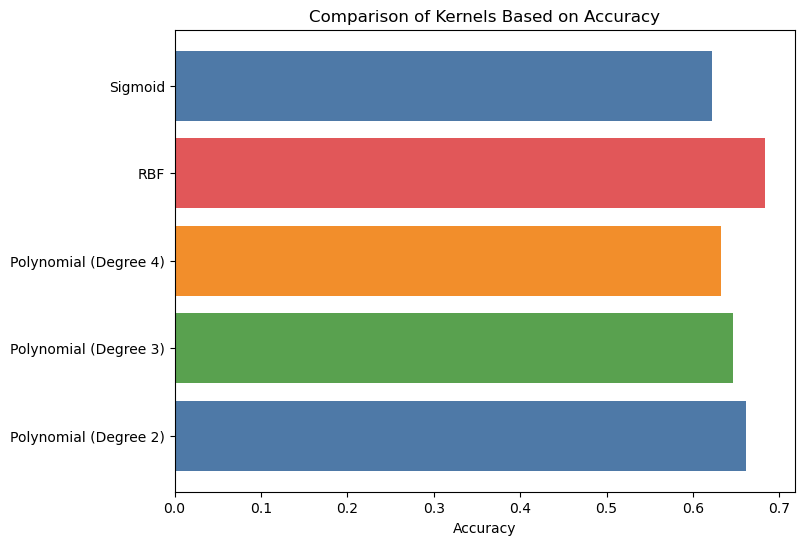

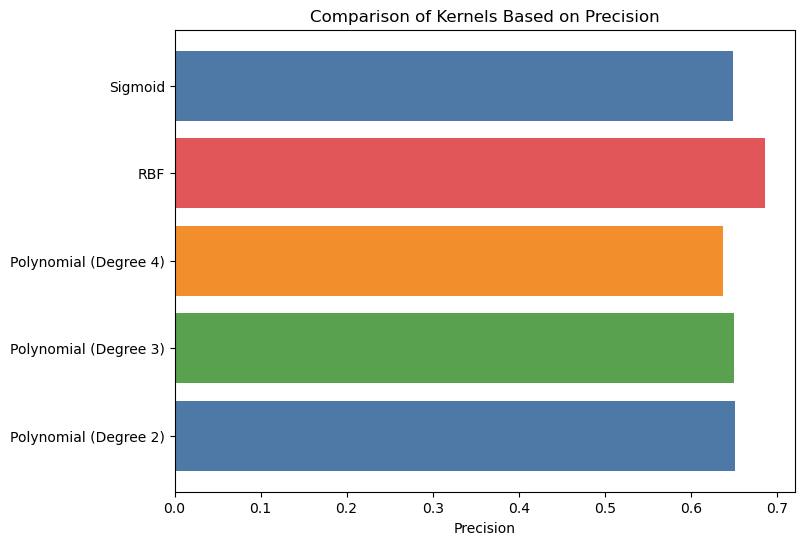

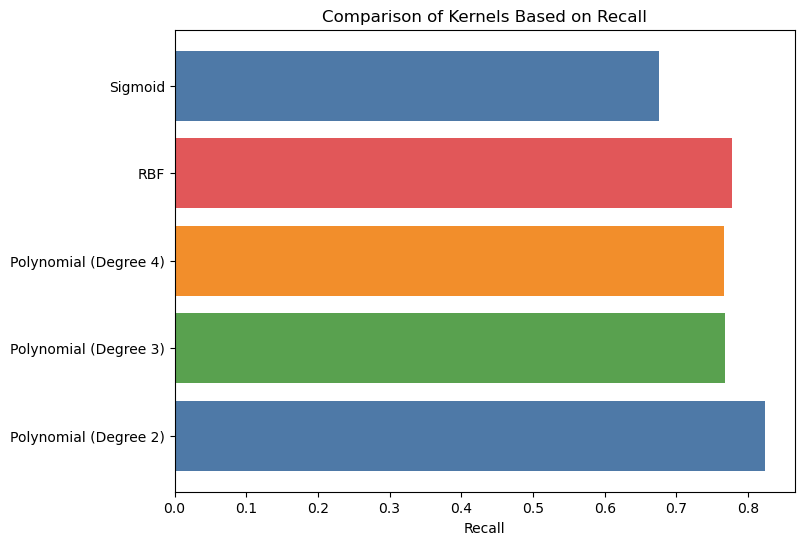

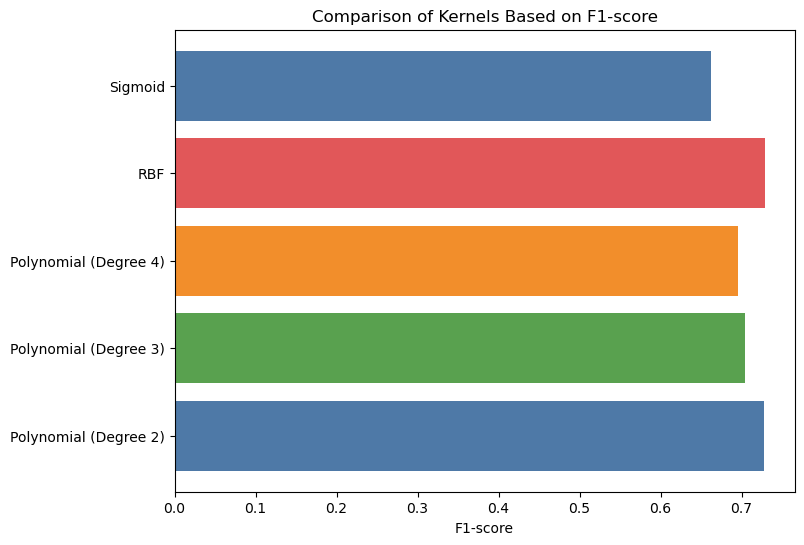

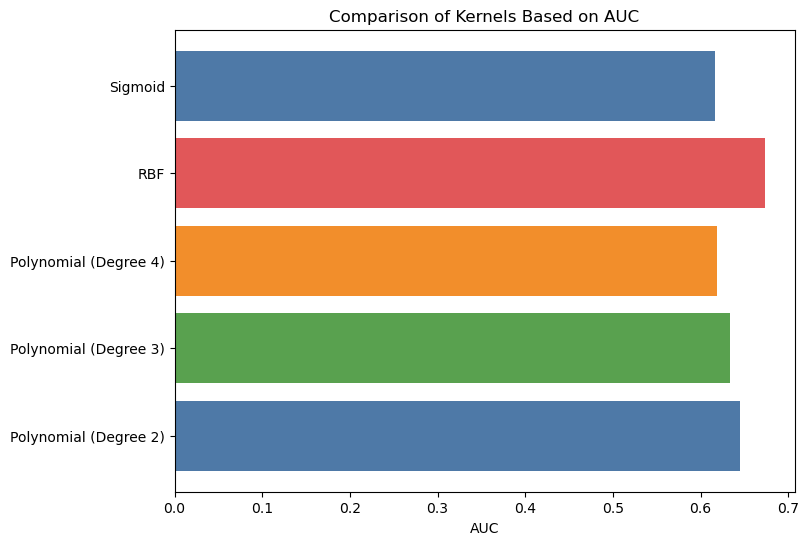

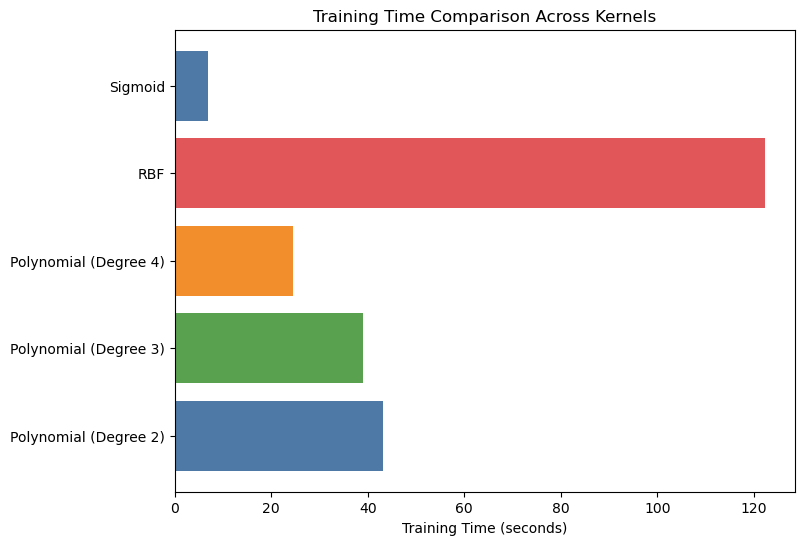

In [69]:
results_df = pd.DataFrame(results)
print(results_df)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    plt.barh(results_df['Kernel'], results_df[metric], color=['#4e79a7', '#59a14f', '#f28e2b', '#e15759'])
    plt.xlabel(metric)
    plt.title(f'Comparison of Kernels Based on {metric}')
    plt.show()

plt.figure(figsize=(8, 6))
plt.barh(results_df['Kernel'], results_df['Training Time'], color=['#4e79a7', '#59a14f', '#f28e2b', '#e15759'])
plt.xlabel('Training Time (seconds)')
plt.title('Training Time Comparison Across Kernels')
plt.show()

# Step 4: Hyperparameter Tuning
We will perform hyperparameter tuning using **Random Search (RandomizedSearchCV)** for different kernels and analyze the sensitivity of SVM performance to different hyperparameters.

### Polynomial Kernel Hyperparamter Tuning with RandomizedSearchCV
We'll train SVM models with polynomial kernels of degrees 2, 3, and 4, tuning the regularization parameter \(C\).

In [73]:
from sklearn.model_selection import RandomizedSearchCV

# defining the search space for polynomial kernel
search_space_poly = {
    'C': [1e-2, 1e-1, 1, 10, 100],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}

# creating the SVC model for polynomial kernel
svc_poly = SVC()

# creating the RandomizedSearchCV object for polynomial kernel
opt_poly = RandomizedSearchCV(svc_poly, search_space_poly, n_iter=20, cv=3, n_jobs=-1, random_state=42)

# timing the optimization process
start_time = time.time()
opt_poly.fit(X, y)
optimization_time_poly = time.time() - start_time

# best model for polynomial kernel
best_model_poly = opt_poly.best_estimator_

# predictions with the best model for polynomial kernel
y_pred_poly = cross_val_predict(best_model_poly, X, y, cv=5)

accuracy_poly, precision_poly, recall_poly, f1_score_poly, auc_poly = calculate_metrics(y, y_pred_poly)

print(f"Polynomial Kernel Optimization Time: {optimization_time_poly} seconds")
print(f"Best Parameters for Polynomial Kernel: {opt_poly.best_params_}")
print(f"Accuracy: {accuracy_poly}")
print(f"Precision: {precision_poly}")
print(f"Recall: {recall_poly}")
print(f"F1-score: {f1_score_poly}")
print(f"AUC: {auc_poly}")

# identifying best degree based on the results
best_degree = opt_poly.best_params_['degree']
print(f"Best Performing Degree for Polynomial Kernel: {best_degree}")

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Polynomial Kernel Optimization Time: 31.89849615097046 seconds
Best Parameters for Polynomial Kernel: {'kernel': 'poly', 'degree': 2, 'C': 10}
Accuracy: 0.6615649183147033
Precision: 0.6511166253101737
Recall: 0.8236032642812304
F1-score: 0.7272727272727273
AUC: 0.6443995781276826
Best Performing Degree for Polynomial Kernel: 2


### RBF Kernel Hyperparameter Tuning with RandomizedSearchCV

We'll use `RandomizedSearchCV` to tune the regularization parameter \(C\) and gamma for the RBF kernel.

In [76]:
# defining the search space for RBF kernel
search_space_rbf = {
    'C': [1e-2, 1e-1, 1, 10, 100],
    'gamma': [1e-3, 1e-2, 0.1, 1, 10],
    'kernel': ['rbf']
}

# creating the SVC model for RBF kernel
svc_rbf = SVC()

# creating the RandomizedSearchCV object for RBF kernel
opt_rbf = RandomizedSearchCV(svc_rbf, search_space_rbf, n_iter=20, cv=3, n_jobs=-1, random_state=42)

# timing the optimization process
start_time = time.time()
opt_rbf.fit(X, y)
optimization_time_rbf = time.time() - start_time

# best model for RBF kernel
best_model_rbf = opt_rbf.best_estimator_

# predictions with the best model for RBF kernel
y_pred_rbf = cross_val_predict(best_model_rbf, X, y, cv=5)

accuracy_rbf, precision_rbf, recall_rbf, f1_score_rbf, auc_rbf = calculate_metrics(y, y_pred_rbf)

print(f"RBF Kernel Optimization Time: {optimization_time_rbf} seconds")
print(f"Best Parameters for RBF Kernel: {opt_rbf.best_params_}")
print(f"Accuracy: {accuracy_rbf}")
print(f"Precision: {precision_rbf}")
print(f"Recall: {recall_rbf}")
print(f"F1-score: {f1_score_rbf}")
print(f"AUC: {auc_rbf}")

RBF Kernel Optimization Time: 69.37374067306519 seconds
Best Parameters for RBF Kernel: {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
Accuracy: 0.6834049871023216
Precision: 0.686339706289831
Recall: 0.7774639045825487
F1-score: 0.72906548933039
AUC: 0.6734409671258121


### Sigmoid Kernel Hyperparameter Tuning with RandomizedSearchCV

We'll use `RandomizedSearchCV` to tune the regularization parameter \(C\) for the Sigmoid kern.m 

In [79]:
# defining the search space for sigmoid kernel
search_space_sigmoid = {
    'C': [1e-2, 1e-1, 1, 10, 100],
    'kernel': ['sigmoid']
}

# creating the SVC model for sigmoid kernel
svc_sigmoid = SVC()

# creating the RandomizedSearchCV object for sigmoid kernel
opt_sigmoid = RandomizedSearchCV(svc_sigmoid, search_space_sigmoid, n_iter=20, cv=3, n_jobs=-1, random_state=42)

# timing the optimization process
start_time = time.time()
opt_sigmoid.fit(X, y)
optimization_time_sigmoid = time.time() - start_time

# best model for sigmoid kernel
best_model_sigmoid = opt_sigmoid.best_estimator_

# predictions with the best model for sigmoid kernel
y_pred_sigmoid = cross_val_predict(best_model_sigmoid, X, y, cv=5)

accuracy_sigmoid, precision_sigmoid, recall_sigmoid, f1_score_sigmoid, auc_sigmoid = calculate_metrics(y, y_pred_sigmoid)

print(f"Sigmoid Kernel Optimization Time: {optimization_time_sigmoid} seconds")
print(f"Best Parameters for Sigmoid Kernel: {opt_sigmoid.best_params_}")
print(f"Accuracy: {accuracy_sigmoid}")
print(f"Precision: {precision_sigmoid}")
print(f"Recall: {recall_sigmoid}")
print(f"F1-score: {f1_score_sigmoid}")
print(f"AUC: {auc_sigmoid}")

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Sigmoid Kernel Optimization Time: 4.081363677978516 seconds
Best Parameters for Sigmoid Kernel: {'kernel': 'sigmoid', 'C': 0.1}
Accuracy: 0.62201203783319
Precision: 0.6488848704038578
Recall: 0.6757689893283113
F1-score: 0.6620541205412054
AUC: 0.6163173588710785


### Hyperparameter Sensitivity Analysis
We will plot the sensitivity of each kernel to varying the hyperparameters.

#### Polynomial Kernel

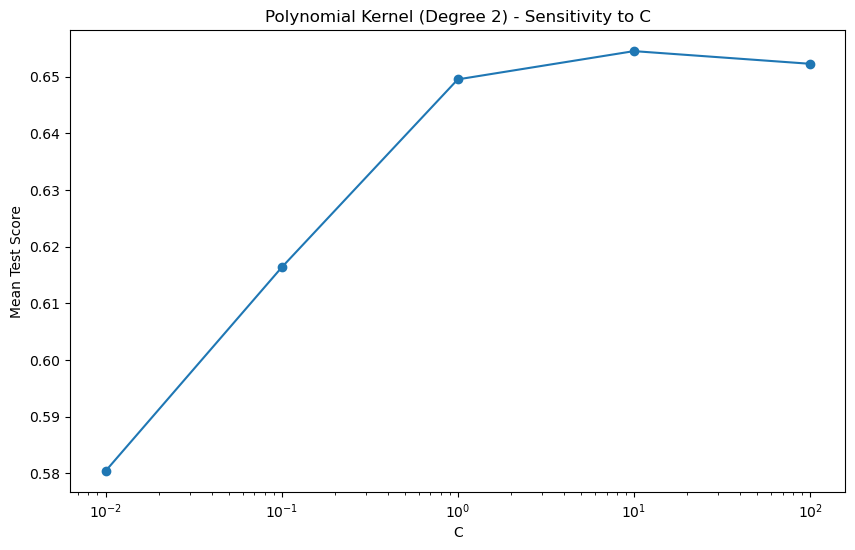

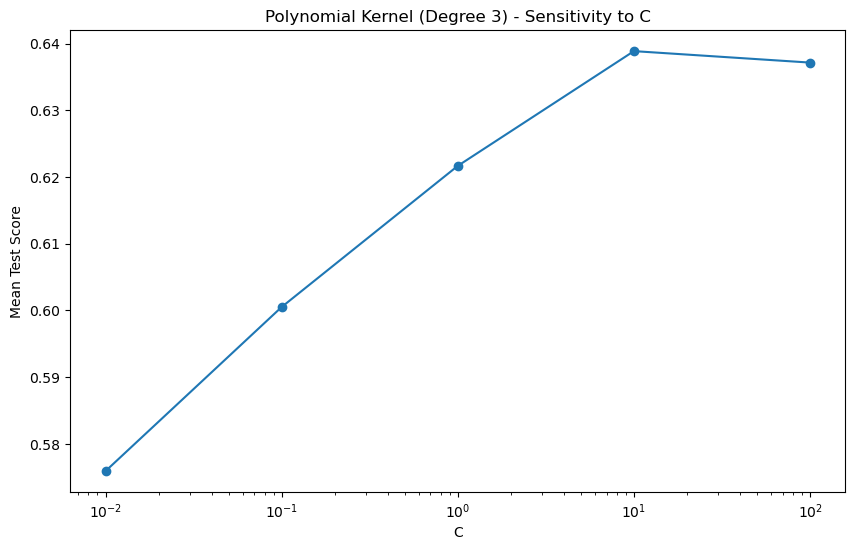

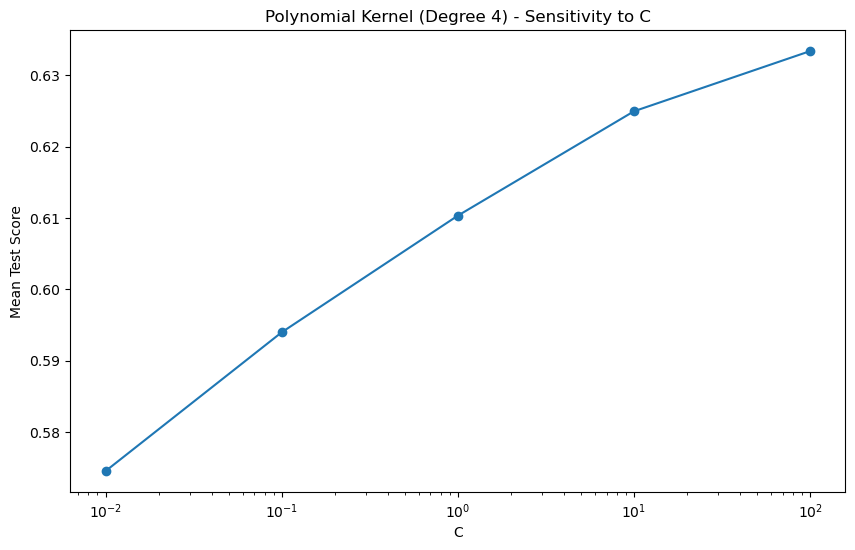

In [83]:
results_poly = opt_poly.cv_results_

def plot_poly_sensitivity(results, degrees):
    for degree in degrees:
        mask = results['param_degree'] == degree
        scores = results['mean_test_score'][mask]
        Cs = results['param_C'][mask]
        
        plt.figure(figsize=(10, 6))
        plt.plot(Cs, scores, marker='o')
        plt.xscale('log')
        plt.title(f'Polynomial Kernel (Degree {degree}) - Sensitivity to C')
        plt.xlabel('C')
        plt.ylabel('Mean Test Score')
        plt.show()

plot_poly_sensitivity(results_poly, [2, 3, 4])

#### RBF Kernel

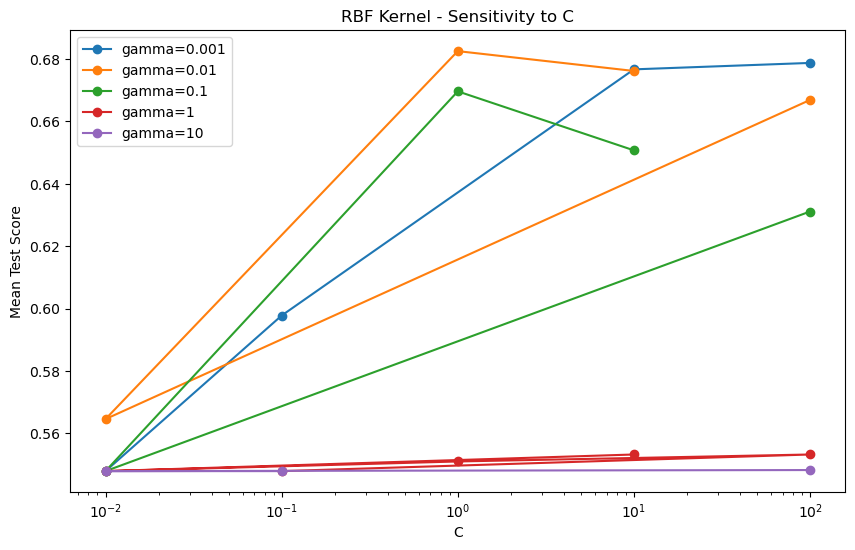

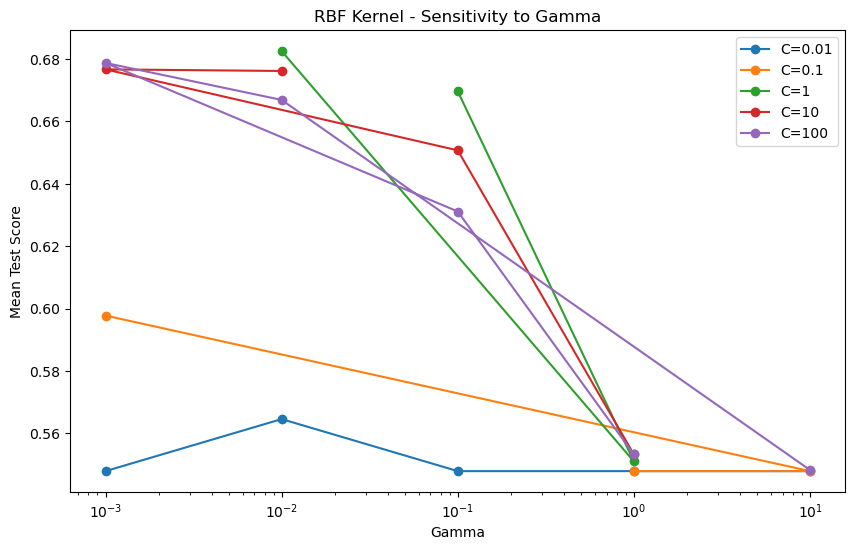

In [86]:
results_rbf = opt_rbf.cv_results_

def plot_rbf_sensitivity_c(results, title):
    scores = results['mean_test_score']
    c_values = results['param_C']

    plt.figure(figsize=(10, 6))
    for gamma in np.unique(results['param_gamma']):
        mask = results['param_gamma'] == gamma
        plt.plot(c_values[mask], scores[mask], marker='o', label=f'gamma={gamma}')
    plt.xscale('log')
    plt.title(f'{title} - Sensitivity to C')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')
    plt.legend()
    plt.show()

def plot_rbf_sensitivity_gamma(results, title):
    scores = results['mean_test_score']
    gamma_values = results['param_gamma']

    plt.figure(figsize=(10, 6))
    for c in np.unique(results['param_C']):
        mask = results['param_C'] == c
        plt.plot(gamma_values[mask], scores[mask], marker='o', label=f'C={c}')
    plt.xscale('log')
    plt.title(f'{title} - Sensitivity to Gamma')
    plt.xlabel('Gamma')
    plt.ylabel('Mean Test Score')
    plt.legend()
    plt.show()

plot_rbf_sensitivity_c(results_rbf, 'RBF Kernel')
plot_rbf_sensitivity_gamma(results_rbf, 'RBF Kernel')

#### Sigmoid Kernel

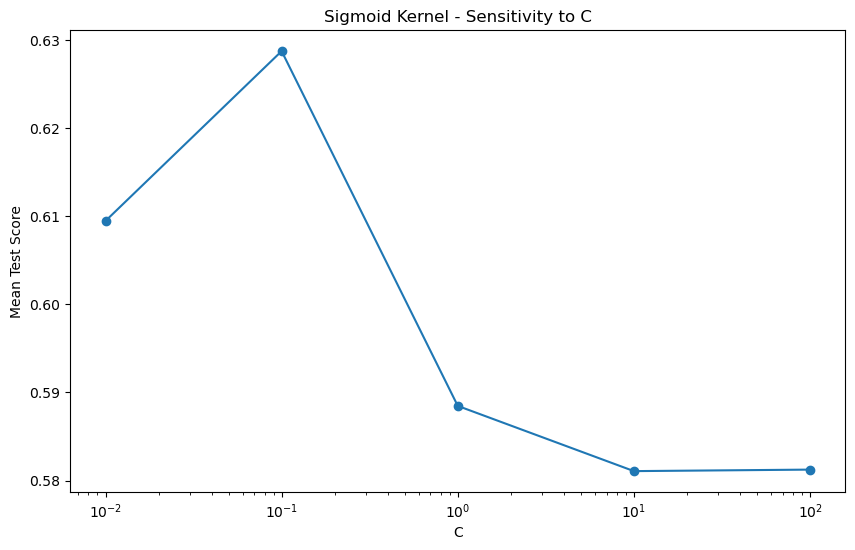

In [89]:
results_sigmoid = opt_sigmoid.cv_results_

def plot_sigmoid_sensitivity(results):
    c_values = np.unique(np.array(results['param_C']))
    mean_scores = [np.mean(results['mean_test_score'][np.array(results['param_C']) == c]) for c in c_values]

    plt.figure(figsize=(10, 6))
    plt.plot(c_values, mean_scores, marker='o')
    plt.xscale('log')
    plt.title('Sigmoid Kernel - Sensitivity to C')
    plt.xlabel('C')
    plt.ylabel('Mean Test Score')
    plt.show()

plot_sigmoid_sensitivity(results_sigmoid)

#### Overall, the RBF kernel gave the highest accuracy, while the polynomial kernel gave the lowest time with a good accuracy.

# Step 5: Analysis
We'll use **LIME** (Local Interpretable Model-Agnostic Explanations) to explain the model's predictions and assess the importance of the most influential features.

In [111]:
import lime
import lime.lime_tabular
import pandas as pd
from sklearn.svm import SVC

best_model_rbf = SVC(C=opt_rbf.best_params_['C'], gamma=opt_rbf.best_params_['gamma'], kernel='rbf', probability=True)
best_model_rbf.fit(X, y)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X.values,
    feature_names=X.columns.values, 
    class_names=['class_0', 'class_1'], 
    mode='classification'
)

for i in range(5):
    exp = explainer.explain_instance(X.iloc[i].values, best_model_rbf.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True)

feature_importance = pd.DataFrame(columns=["Feature", "Importance"])

for i in range(5):
    exp = explainer.explain_instance(X.iloc[i].values, best_model_rbf.predict_proba, num_features=10)
    temp_df = pd.DataFrame(exp.as_list(), columns=["Feature", "Importance"])
    feature_importance = pd.concat([feature_importance, temp_df], ignore_index=True)

mean_importance = feature_importance.groupby("Feature").mean().sort_values(by="Importance", ascending=False)
print(mean_importance)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_23276\1038980943.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feature_importance = pd.concat([feature_importance, temp_df], ignore_index=True)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ba

                                       Importance
Feature                                          
feature_23^2 > 1.27                      0.153437
feature_26^2 <= 0.06                     0.132619
0.06 < feature_26^2 <= 0.33              0.098006
feature_26 feature_28 > 0.54             0.072766
feature_6 feature_27 <= -0.10            0.067791
feature_28^2 <= 0.08                     0.067490
feature_27^2 <= 0.07                     0.063416
0.08 < feature_28^2 <= 0.35              0.047194
0.07 < feature_27^2 <= 0.37              0.045291
feature_6 feature_26 > 0.48              0.041830
feature_10 feature_27 <= -0.15           0.041101
feature_1 feature_6 <= -0.33             0.037436
feature_1 feature_9 > 0.70               0.036438
feature_26 feature_27 > 0.77             0.036072
feature_17^2 <= 0.68                     0.034189
0.35 < feature_28^2 <= 1.15              0.031726
feature_4 feature_26 > 0.30              0.027203
0.12 < feature_7^2 <= 0.49               0.020548
